In [1]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.metrics import confusion_matrix
%matplotlib inline
import seaborn as sns

import numpy as np # linear algebra
import pandas as pd #data processing

import os
import re
import nltk
nltk.download('punkt')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Importing the Data
I have imported the data using my drive link.
I have also provided the csv files in the repository, you can download those files and use them.

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [0]:
train = pd.read_csv('/content/gdrive/My Drive/Data_Fake_News/train.csv')
test = pd.read_csv('/content/gdrive/My Drive/Data_Fake_News/test.csv')

In [4]:
print(train.shape, test.shape)

(20800, 5) (5200, 4)


Now, we will fill the null values with spaces so that our text data could be consistent

In [5]:
print(train.isnull().sum())
print("***")
print(test.isnull().sum())

id           0
title      558
author    1957
text        39
label        0
dtype: int64
***
id          0
title     122
author    503
text        7
dtype: int64


In [6]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In the given data, all the features like title, author and text are important. SO, we can combine all the text features to make one feature. Let's call it *total*

In [0]:
train = train.fillna(' ')
test = test.fillna(' ')

test['total'] = test['title'] + ' ' + test['author'] + ' ' + test['text']
train['total'] = train['title'] + ' ' + train['author'] + ' ' + train['text']

In [8]:
train.head()

,id,title,author,text,label,total
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Consortiumne...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...


In [9]:
test.head()

,id,title,author,text,total
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...","Specter of Trump Loosens Tongues, if Not Purse..."
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,#NoDAPL: Native American Leaders Vow to Stay A...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...","Tim Tebow Will Attempt Another Comeback, This ..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,Keiser Report: Meme Wars (E995) Truth Broadcas...


# Creating Word Clouds

First, we would form two strings. One including all the words from news which is real, and another false string consisting of all the words from fake news.

In [0]:
real_words = ''
fake_words = ''
stopwords = set(STOPWORDS) 

'''
STOPWORDS library provides us with all those words which are really common 
in the English language and do not contribute in deciding whether the news
is real or fake
'''

# iterate through the csv file 
for val in train[train['label']==1].total:
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    real_words += " ".join(tokens)+" "

for val in train[train['label']==0].total: 
      
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    fake_words += " ".join(tokens)+" "

Now we will plot the wordclouds for the most frequent words in real news and fake news separately. 

This is the wordclouds for words in real news

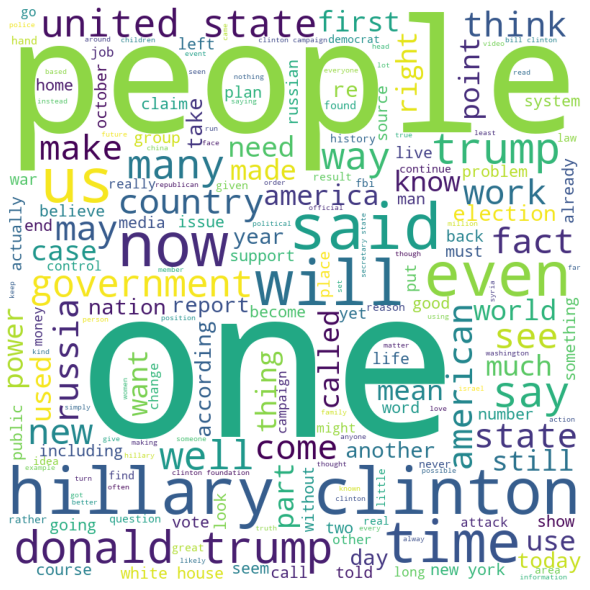

In [11]:
wordcloud = WordCloud(width = 800, height = 800,
                      background_color = 'white',
                      stopwords = stopwords,
                      min_font_size = 10).generate(real_words)
                
# Plot the wordcloud image
plt.figure(figsize = (8,8), facecolor= None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

Given below is the wordcloud for most frequent words in fake news articles.

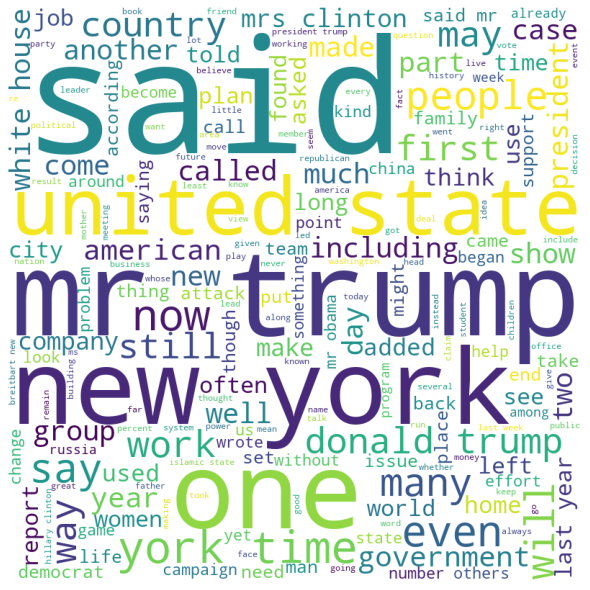

In [12]:
wordcloud = WordCloud(width = 800, height = 800,
                      background_color = 'white',
                      stopwords = stopwords,
                      min_font_size = 10).generate(fake_words)
                
# Plot the wordcloud image
plt.figure(figsize = (8,8), facecolor= None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

# Preprocessing/ Cleaning of Data

In [13]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Lemmatization
Lemmatization is the process of grouping together the different inflected forms of a word so they can be analysed as a single item.

In [14]:
nltk.download("wordnet")
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

for index, row in train.iterrows():
    filter_sentence = ''
    sentence = row['total']
    
    # Cleaning the sentence with regex
    sentence = re.sub(r'[^\w\s]', '', sentence)
    
    # Tokenization
    words = nltk.word_tokenize(sentence)

    # Stopwords removal
    words = [w for w in words if not w in stop_words]

    for words in words:
        filter_sentence = filter_sentence  + ' ' + str(lemmatizer.lemmatize(words)).lower()

    train.loc[index, 'total'] = filter_sentence

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Now, as we have transformed the text data, we can clean the data and separate them into X and Y

In [0]:
train = train[['total', 'label']]

In [16]:
train.head()

,total,label
0,house dem aide we didnt even see comeys lette...,1
1,flynn hillary clinton big woman campus breitb...,0
2,why truth might get you fired consortiumnewsc...,1
3,15 civilians killed in single us airstrike ha...,1
4,iranian woman jailed fictional unpublished st...,1


In [0]:
X_train = train['total']
Y_train = train['label']

## Vectorizer

By using CountVectorizer function we can convert text document to matrix of word count.



In [0]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
def vectorize_text(features, max_features):
    vectorizer = TfidfVectorizer( stop_words='english',
                            decode_error='strict',
                            analyzer='word',
                            ngram_range=(1, 2),
                            max_features=max_features
                            #max_df=0.5 # Verwendet im ML-Kurs unter Preprocessing                   
                            )
    feature_vec = vectorizer.fit_transform(features)
    return feature_vec.toarray()

In [0]:
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(X_train)
freq_term_matrix = count_vectorizer.transform(X_train)
tfidf = TfidfTransformer(norm = "l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)

In [21]:
tf_idf_matrix

<20800x210578 sparse matrix of type '<class 'numpy.float64'>'
	with 5990653 stored elements in Compressed Sparse Row format>

Now, as we have prepared the data, we can split the data into training and test set to check which model will be best suited for classification

In [0]:
#split in samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tf_idf_matrix, Y_train, random_state=0)

# Logistic Regression Model

In [23]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
pred = logreg.predict(X_test)
print('Accuracy of Lasso classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Lasso classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))
cm = confusion_matrix(y_test, pred)
cm

Accuracy of Lasso classifier on training set: 0.98
Accuracy of Lasso classifier on test set: 0.96


array([[2448,  116],
       [  84, 2552]])

# Naive Bayes

In [24]:
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()
NB.fit(X_train, y_train)
pred = NB.predict(X_test)
print('Accuracy of NB  classifier on training set: {:.2f}'
     .format(NB.score(X_train, y_train)))
print('Accuracy of NB classifier on test set: {:.2f}'
     .format(NB.score(X_test, y_test)))
cm = confusion_matrix(y_test, pred)
cm

Accuracy of NB  classifier on training set: 0.89
Accuracy of NB classifier on test set: 0.84


array([[2557,    7],
       [ 803, 1833]])

In [25]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print('Accuracy of DT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of DT classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))
cm = confusion_matrix(y_test, pred)
cm

Accuracy of DT classifier on training set: 1.00
Accuracy of DT classifier on test set: 0.97


array([[2466,   98],
       [  66, 2570]])

We can easily see that out of the three models, Decision Tree Classifier performs best.
Now, we will make a pipeline so that we can easily perform the classification task for any new data

# Pipeline

In [0]:
#Assiging the variables again as once transformed vectors can't be transformed again using pipeline.
X_train = train['total']
Y_train = train['label']

In [0]:
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn import tree
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer(norm='l2')),
    ('clf', tree.DecisionTreeClassifier()),
])

In [37]:
pipeline.fit(X_train, Y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
              

In [38]:
result = pipeline.predict(["flynn hillary clinton big woman campus breitbart daniel j flynnever get feeling life circle roundabout rather head straight line toward intended destination hillary clinton remains big woman campus leafy liberal wellesley massachusetts everywhere else vote likely inauguration dress remainder day way miss havisham forever wore wedding dress speaking great expectations hillary rodham overflowed 48 year ago first addressed wellesley graduating class the president college informed gathered 1969 student needed debate far i could ascertain spokesman kind like democratic primary 2016 minus term unknown even seven sisters school i glad miss adams made clear i speaking today u 400 u miss rodham told classmate after appointing edger bergen charlie mccarthys mortimer snerds attendance bespectacled granny glass awarding matronly wisdom least john lennon wisdom took issue previous speaker despite becoming first win election seat u s senate since reconstruction edward brooke came criticism calling empathy goal protestors criticized tactic though clinton senior thesis saul alinsky lamented black power demagogue elitist arrogance repressive intolerance within new left similar word coming republican necessitated brief rebuttal trust rodham ironically observed 1969 one word i asked class rehearsal wanted say everyone came said talk trust talk lack trust u way feel others talk trust bust what say what say feeling permeates generation perhaps even understood distrusted the trust bust certainly busted clintons 2016 plan she certainly even understand people distrusted after whitewater travelgate vast conspiracy benghazi missing email clinton found distrusted voice friday there load compromising road broadening political horizon and distrust american people trump edged 48 percent 38 percent question immediately prior novembers election stood major reason closing horizon clinton described vanquisher supporter embracing lie con alternative fact assault truth reason she failed explain american people chose lie truth as history major among today know well people power invent fact attack question mark beginning end free society offered that hyperbole like many people emerge 1960s hillary clinton embarked upon long strange trip from high school goldwater girl wellesley college republican president democratic politician clinton drank time place gave degree more significantly went idealist cynic comparison two wellesley commencement address show way back lamented long leader viewed politics art possible challenge practice politics art making appears impossible possible now big woman campus odd woman white house wonder current station even possible why arent i 50 point ahead asked september in may asks isnt president the woman famously dubbed congenital liar bill safire concludes lie mind getting stood election day like finding jilted bride wedding day inspires dangerous delusion"])
print(result)

[0]
